## Решение задачи линейной регрессии

#### Белоусова Ольга, Б03-904

**Тип задачи** — обучение с учителем.

**Вид задачи** — линейная регрессия.

**Целевая переменная** — действительное число $\mathit{y}$, размерность 1.

**Функция потерь** — среднеквадратичное отклонение (*root-mean-square deviation, RMSE*).

**Мера качества** — обратная функция потерь. Чем меньше ср. кв. отклонение, тем лучше модель.

**Признаковое описание объектов** — действительные числа $\mathit{x_1, x_2, x_3, x_4}$, размерность 4.


### Часть 1. Создание и обучение модели

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Решаем задачу линейной регрессии методом максимального правдоподобия.
Введём матрицу объекты-признаки:

In [2]:
X = np.load('./X_train.npy')
Y = np.load('./y_train.npy')

Добавив слева столбец единиц к матрице объектов-признаков, воспользуемся формулой из лекции для расчёта $\theta$:

In [3]:
X_0 = np.ones((X.shape[0],1))
X_new = np.concatenate([X_0, X], axis = 1)

Возьмём все наборы данных. Для каждого по очереди проведём расчёт $\theta$:

In [4]:
X1 = X_new[:, [0,1]]
m1 = np.dot(X1.T, X1)
m2 = np.linalg.inv(m1)
m3 = np.dot(m2, X1.T)
theta = np.dot(m3, Y)
print(theta)
theta.shape
Y_approximated_1 = np.dot(X1, theta)

X2 = X_new[:, [0,2]]
m1 = np.dot(X2.T, X2)
m2 = np.linalg.inv(m1)
m3 = np.dot(m2, X2.T)
theta = np.dot(m3, Y)
print(theta)
theta.shape
Y_approximated_2 = np.dot(X1, theta)

X3 = X_new[:, [0,3]]
m1 = np.dot(X3.T, X3)
m2 = np.linalg.inv(m1)
m3 = np.dot(m2, X3.T)
theta = np.dot(m3, Y)
print(theta)
theta.shape
Y_approximated_3 = np.dot(X3, theta)

X4 = X_new[:, [0,4]]
m1 = np.dot(X4.T, X4)
m2 = np.linalg.inv(m1)
m3 = np.dot(m2, X4.T)
theta = np.dot(m3, Y)
print(theta)
theta.shape
Y_approximated_4 = np.dot(X4, theta)

[[14.4790691 ]
 [ 2.11336604]]
[[14.47939662]
 [ 2.10915978]]
[[-1.35116417]
 [ 0.55067053]]
[[14.43284451]
 [ 0.05615672]]


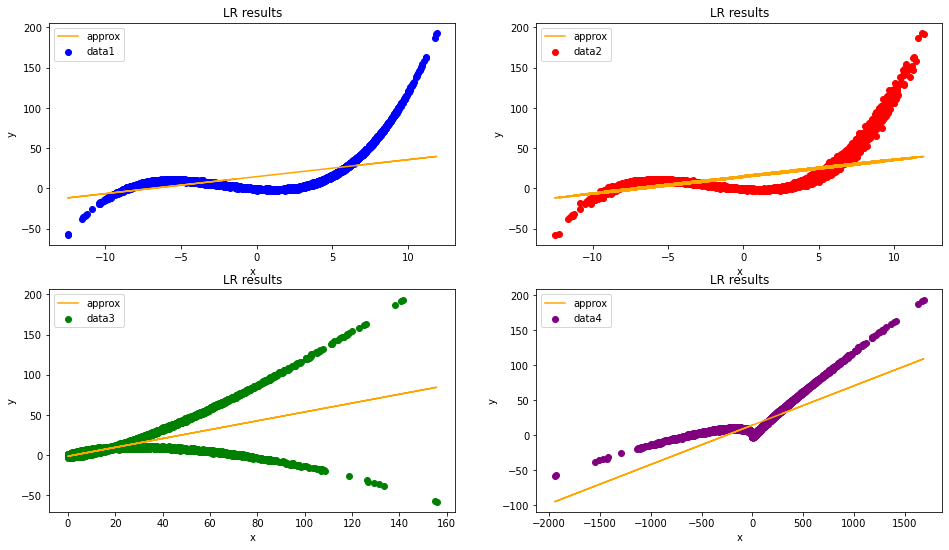

In [5]:
fig = plt.figure(figsize=(16, 9))

P = fig.add_subplot(2, 2, 1)
P = plt.scatter(X1[:, 1], Y, color = 'blue', label = 'data1')
P = plt.plot(X1[:, 1], Y_approximated_1, color = 'orange', label = 'approx')
P = plt.legend()
P = plt.title('LR results')
P = plt.xlabel('x')
P = plt.ylabel('y')

P = fig.add_subplot(2, 2, 2)
P = plt.scatter(X2[:, 1], Y, color = 'red', label = 'data2')
P = plt.plot(X2[:, 1], Y_approximated_2, color = 'orange', label = 'approx')
P = plt.legend()
P = plt.title('LR results')
P = plt.xlabel('x')
P = plt.ylabel('y')

P = fig.add_subplot(2, 2, 3)
P = plt.scatter(X3[:, 1], Y, color = 'green', label = 'data3')
P = plt.plot(X3[:, 1], Y_approximated_3, color = 'orange', label = 'approx')
P = plt.legend()
P = plt.title('LR results')
P = plt.xlabel('x')
P = plt.ylabel('y')

P = fig.add_subplot(2, 2, 4)
P = plt.scatter(X4[:, 1], Y, color = 'purple', label = 'data4')
P = plt.plot(X4[:, 1], Y_approximated_4, color = 'orange', label = 'approx')
P = plt.legend()
P = plt.title('LR results')
P = plt.xlabel('x')
P = plt.ylabel('y')

Убеждаемся визуально, что предложенный метод решения действительно даёт линейную зависимость с минимальным отклонением. 

Теперь применить формулы и посчитать $\theta$ для всего набора данных:

In [6]:
#X1 = X_new[:, [0,1]]
m1 = np.dot(X_new.T, X_new)
m2 = np.linalg.inv(m1)
m3 = np.dot(m2, X_new.T)
theta = np.dot(m3, Y)
print(theta)
theta.shape
Y_approximated = np.dot(X_new, theta)

[[-0.98643434]
 [-0.70247201]
 [-0.73652729]
 [ 0.53441968]
 [ 0.08096281]]


### Часть 2. Испытание модели на тестовой выборке. Функция качества

Выделим тестовую выборку для финальной оценки качества модели. Для этого случайным образом возьмём данные из признакового описания объектов. Затем сделаем аппроксимацию целевой переменной на тестовой и тренировочной выборках.

In [7]:
random_index = np.random.permutation(X_new.shape[0])
random_index_0 = random_index[:1000]

X_test = X_new[[random_index_0],:]
Y_test = Y[random_index_0]

Y_approximated_test = np.dot(X_test, theta)
#print(Y_approximated_test)
#Y_approximated_test.shape

Y_approximated_train = np.dot(X_new, theta)
#print(Y_approximated_train)
#Y_approximated_train.shape

Посчитаем меру качества для обеих выборок:

In [8]:
RMSE_test = np.sqrt(np.sum(np.square(Y_approximated_test - Y_test))/Y_test.shape[0])
print('RMSE test =', RMSE_test)
RMSE_train = np.sqrt(np.sum(np.square(Y_approximated_train - Y))/Y_test.shape[0])
print('RMSE train =', RMSE_train)

RMSE test = 0.7215569449152587
RMSE train = 2.250624791784649


Видим, что на тренировочных данных ошибка значительно больше. Возможно, модель недообучена.

### Часть 3. Вновь поступающие объекты

Применим нашу модель на 3-й порции данных: вновь поступившим объектам.

In [21]:
X_int = np.load('./X_inference.npy')
X_int_0 = np.ones((X_int.shape[0],1))
X_int_new = np.concatenate([X_int_0, X_int], axis = 1)
Y_int_approximated = np.dot(X_int_new, theta)

Затем построим гистограммы признаковых и целевой переменной:

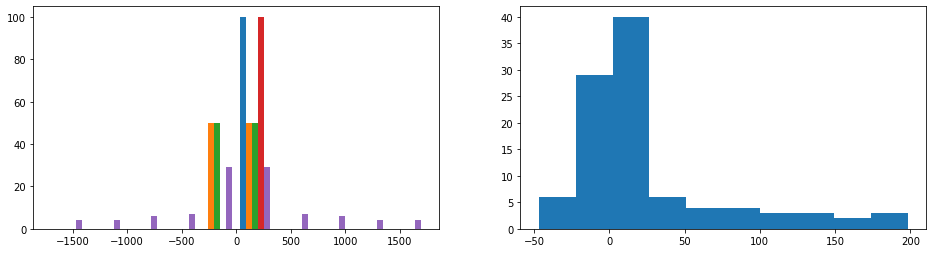

In [22]:
fig = plt.figure(figsize=(16, 9))

P = fig.add_subplot(2, 2, 1)
P = plt.hist(X_int_new)

P = fig.add_subplot(2, 2, 2)
P = plt.hist(Y_int_approximated)

А затем графики зависимости признаковых переменных от целевой:

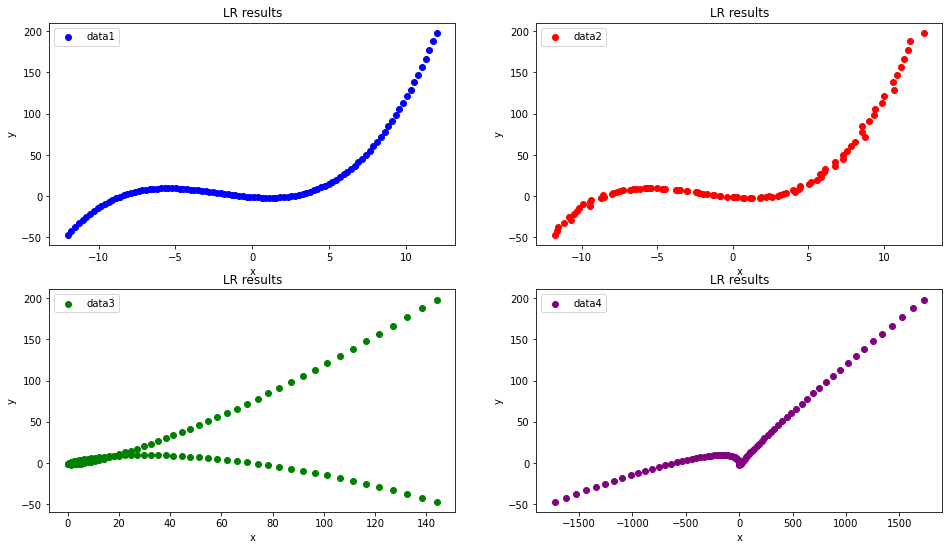

In [24]:
fig = plt.figure(figsize=(16, 9))

P = fig.add_subplot(2, 2, 1)
P = plt.scatter(X_int_new[:,[1]], Y_int_approximated, color = 'blue', label = 'data1')
P = plt.legend()
P = plt.title('LR results')
P = plt.xlabel('x')
P = plt.ylabel('y')

P = fig.add_subplot(2, 2, 2)
P = plt.scatter(X_int_new[:,[2]], Y_int_approximated, color = 'red', label = 'data2')
P = plt.legend()
P = plt.title('LR results')
P = plt.xlabel('x')
P = plt.ylabel('y')

P = fig.add_subplot(2, 2, 3)
P = plt.scatter(X_int_new[:,[3]], Y_int_approximated, color = 'green', label = 'data3')
P = plt.legend()
P = plt.title('LR results')
P = plt.xlabel('x')
P = plt.ylabel('y')

P = fig.add_subplot(2, 2, 4)
P = plt.scatter(X_int_new[:,[4]], Y_int_approximated, color = 'purple', label = 'data4')
P = plt.legend()
P = plt.title('LR results')
P = plt.xlabel('x')
P = plt.ylabel('y')